<a href="https://colab.research.google.com/github/pycriador/pyJumpCloud/blob/main/Resolu%C3%A7%C3%A3o_Desafio_Loft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio Loft

O desafio será criar um código em python que:

1. Acesse o google sheets (via API)
2. Recupere os dados do usuários
3. Crie os usuários no JumpCloud (via API) com os dados adquiridos no passo

Instalação de bibliotecas Python

In [ ]:
!pip install google-api-python-client google-auth-httplib2 google-auth-oauthlib pandas

Definir os imports necessários

In [3]:
#Realizar os Imports necessários para rodar a solução
import requests
from googleapiclient.discovery import build
from google.oauth2 import service_account
#O pandas aqui é para facilitar a gestão dos dados retornados da API Google
import pandas as pd

Informar URL e APIKey para JumpCloud

In [10]:
#URL da API de cadastro de usuários da JumpCloud
#https://docs.jumpcloud.com/api/2.0/index.html#operation/bulk_usersCreate
URLJumpCloud = "https://console.jumpcloud.com/api/v2/bulk/users"
#Chave única do usuário JumpCloud
#Olhar documentos do Github para mais informações
APIKeyJumpCloud = ''
#Cabeçalho necessário para API de cadastro do JumpCloud
headers = {
    "creation-source": "jumpcloud:bulk",
    "x-api-key": APIKeyJumpCloud,
    "content-type": "application/json"
}

Informando ID da Planilha, escopo da API Google e chaves

In [11]:
#Planilha onde estão os dados para cadastro
#https://docs.google.com/spreadsheets/d/1MxIAzLWnC2iFQ_9SCUjPv0ZffngLjVSoq74N8EV8WU4/edit#gid=0
#Coletar somente o ID
IDGoogleSheet = '1MxIAzLWnC2iFQ_9SCUjPv0ZffngLjVSoq74N8EV8WU4'
#Os escopos da API Google Sheets para leitura da planilha
GoogleAPIScopes = ['https://www.googleapis.com/auth/spreadsheets.readonly']
#Chave com as credenciais com acesso a API do Google Sheets
#Olhar documentos do Github para mais informações
#Se necessário, renomear o arquivo ou mudar o valor da variável
GoogleServiceAccountFile = 'keys.json'

Aplicação principal, comentários de cada parte em verde

In [12]:
#Informando as credenciais para a biblioteca service_account
credentials = service_account.Credentials.from_service_account_file(GoogleServiceAccountFile, scopes=GoogleAPIScopes)
#Criando o serviço com as credenciais
service = build('sheets', 'v4', credentials=credentials)
#Chamando a API
sheet = service.spreadsheets()
#Coletando os dados de A até J, conforme está na planilha de exemplo
#Se necessário, modificar o intervalo
result = sheet.values().get(spreadsheetId=IDGoogleSheet,range="Sheet1!A:J").execute()
#Filtrando somente os valores da planilha
values = result.get('values', [])
#Transformando os dados em um DataFrame pandas
#Como o valor retornado o primeiro conjunto de dados são o cabeçalho [[header],[data],[data],[data]]
#Posso usar o values[0] para informar para o pandas o cabeçalho
#E tudo depois de values[1] é dado, por isso coloco : (dois pontos) 
df = pd.DataFrame(data=values[1:], columns=values[0])

## Validação dos dados recebidos

In [13]:
df

,Username,Email,First Name,Last Name,Display Name,Company,Departament,Cost Center,github_user,cpf
0,juninho.oliveira,juninho.oliveira@xpto.com.br,Juninho,Oliveira,Juninho Oliveira,XPTO,Infosec,77,joana.silva44,67898656805
1,claudia.santos,claudia.santos@xpto.com.br,Claudia,Santos,Claudia Santos,XPTO,Infra,88,ana.pereira55,45867525678
2,carlos.silva,carlos.silva@xpto.com.br,Carlos,Silva,Carlos Silva,XPTO,Engenharia,99,joao.augusto66,67827645602


## Antes da importação dos dados

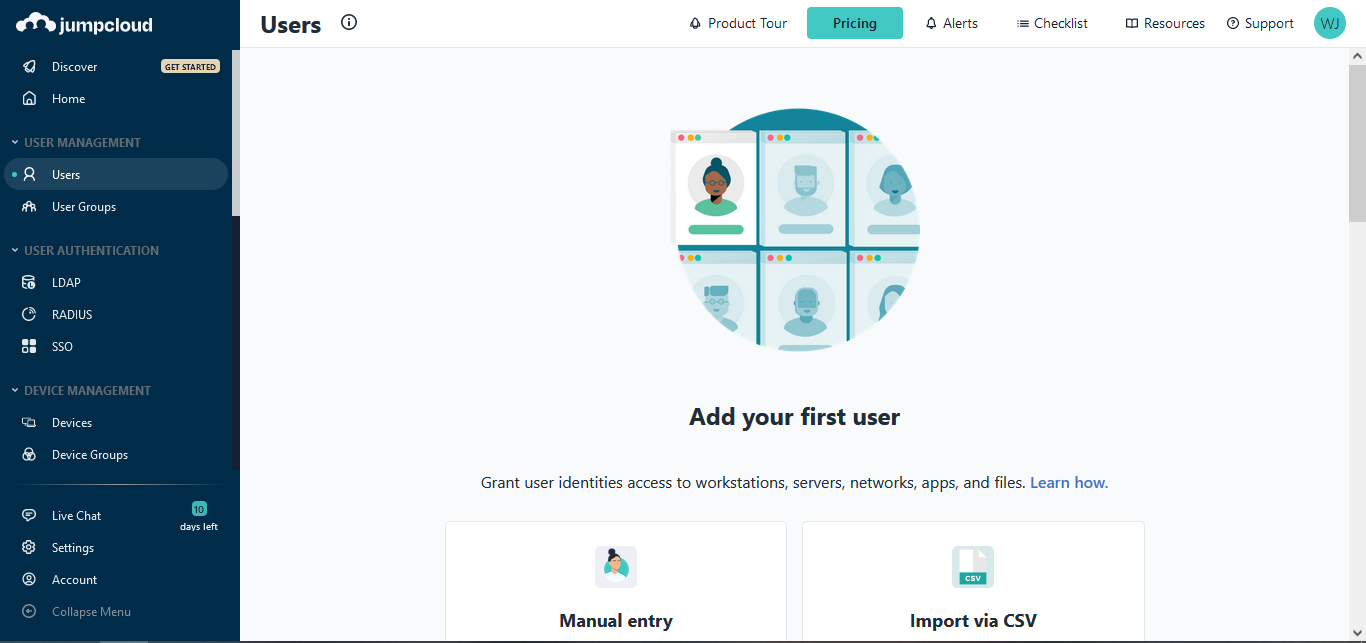

Loop principal para envio dos cadastros via API JumpCloud

In [14]:
#Crio uma lista para armazenar os dados
payload = []
#Faço o loop no DataFrame para criar o payload no formato que a API aceita
for index, row in df.iterrows():
  data = {
        "attributes": [{ "name": "githubuser", "value": row['github_user']}, 
                       {"name": "cpf", "value": row['cpf']}],
        "email": row['Email'],
        "firstname": row['First Name'],
        "lastname": row['Last Name'],
        "username": row['Username'],
        "displayname": row['Display Name'],
        "company": row['Company'],
        "department": row['Departament'],
        "costCenter": row['Cost Center']
    }
  payload.append(data)

#Envio o payload e headers para a JumpCloud e aguardo o e-mail de confirmação
resp = requests.request("POST", URLJumpCloud, json=payload, headers=headers)

## Dados importados com sucesso

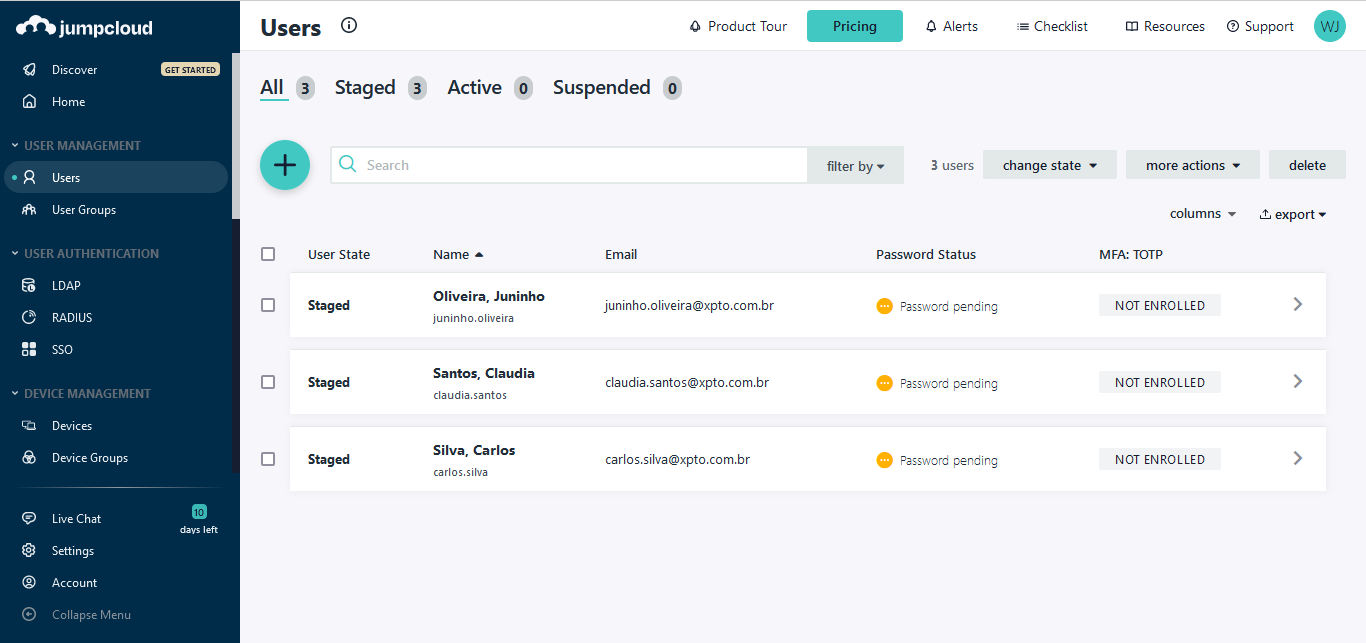

Dados preenchidos conforme o desafio

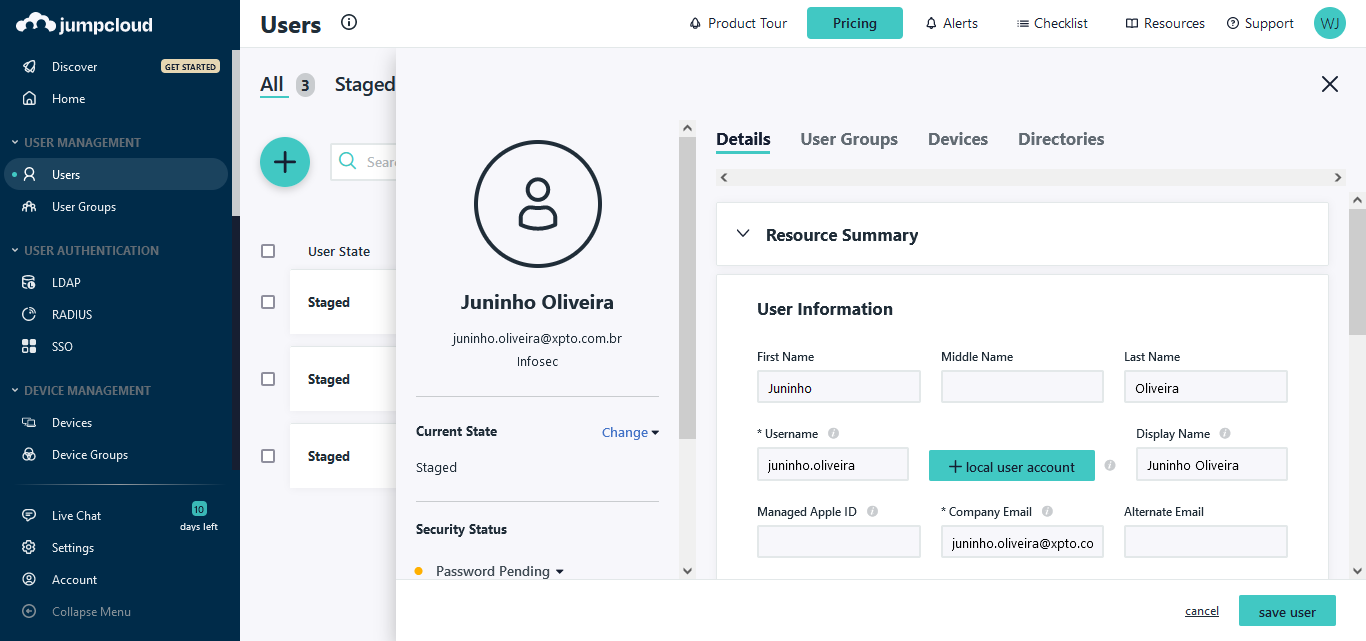

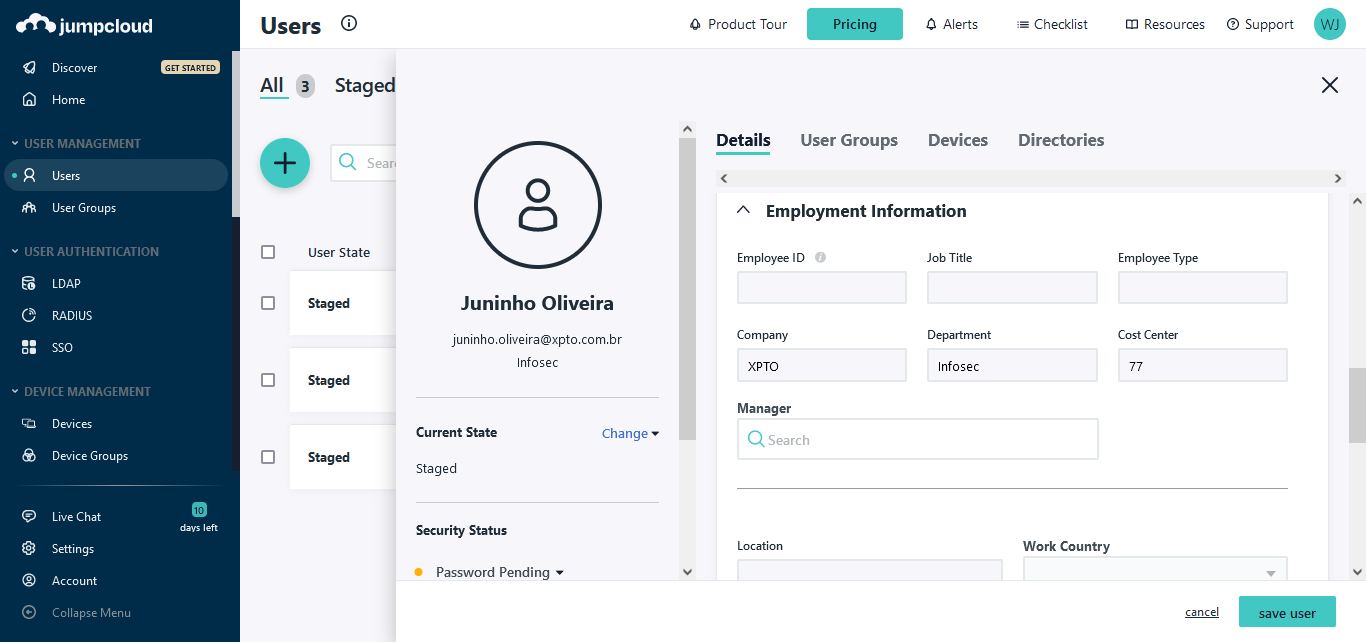
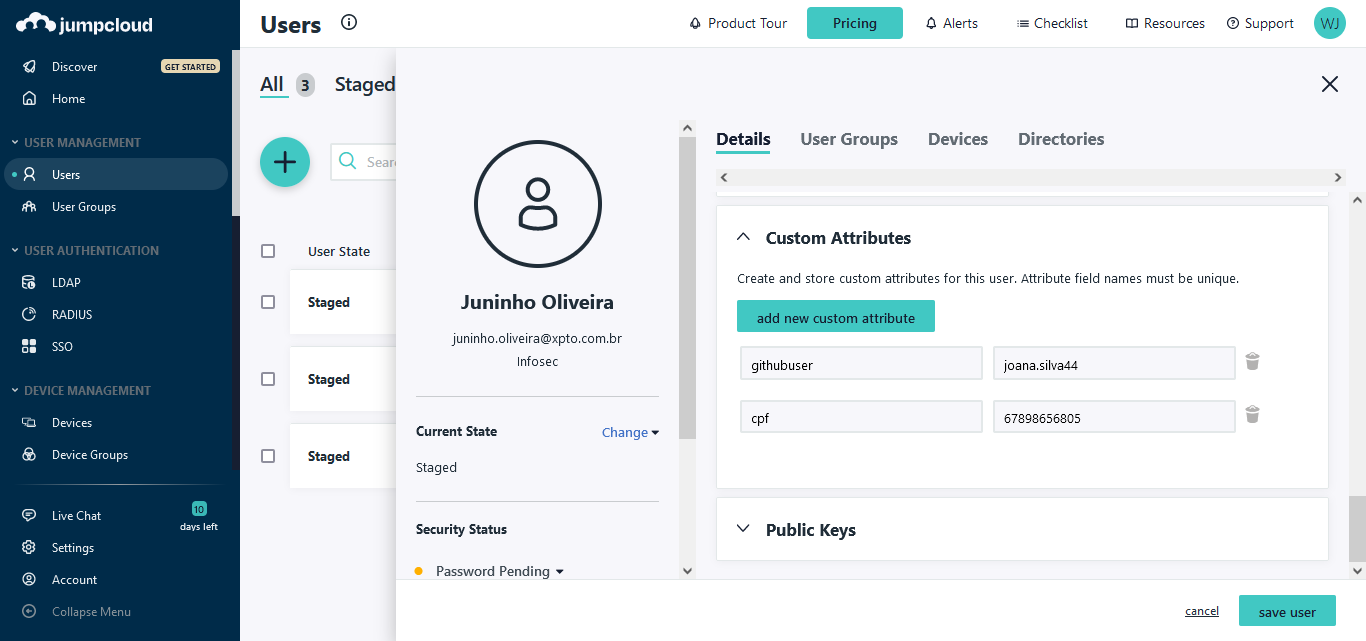